In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats

## Part 0: Preparations

Load the data set you chose and explore its theme, columns and rows.
Calculate the mean, median and standard variation for each (at least ) numerical column.

In [2]:
data = pd.read_csv("housing.csv")
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

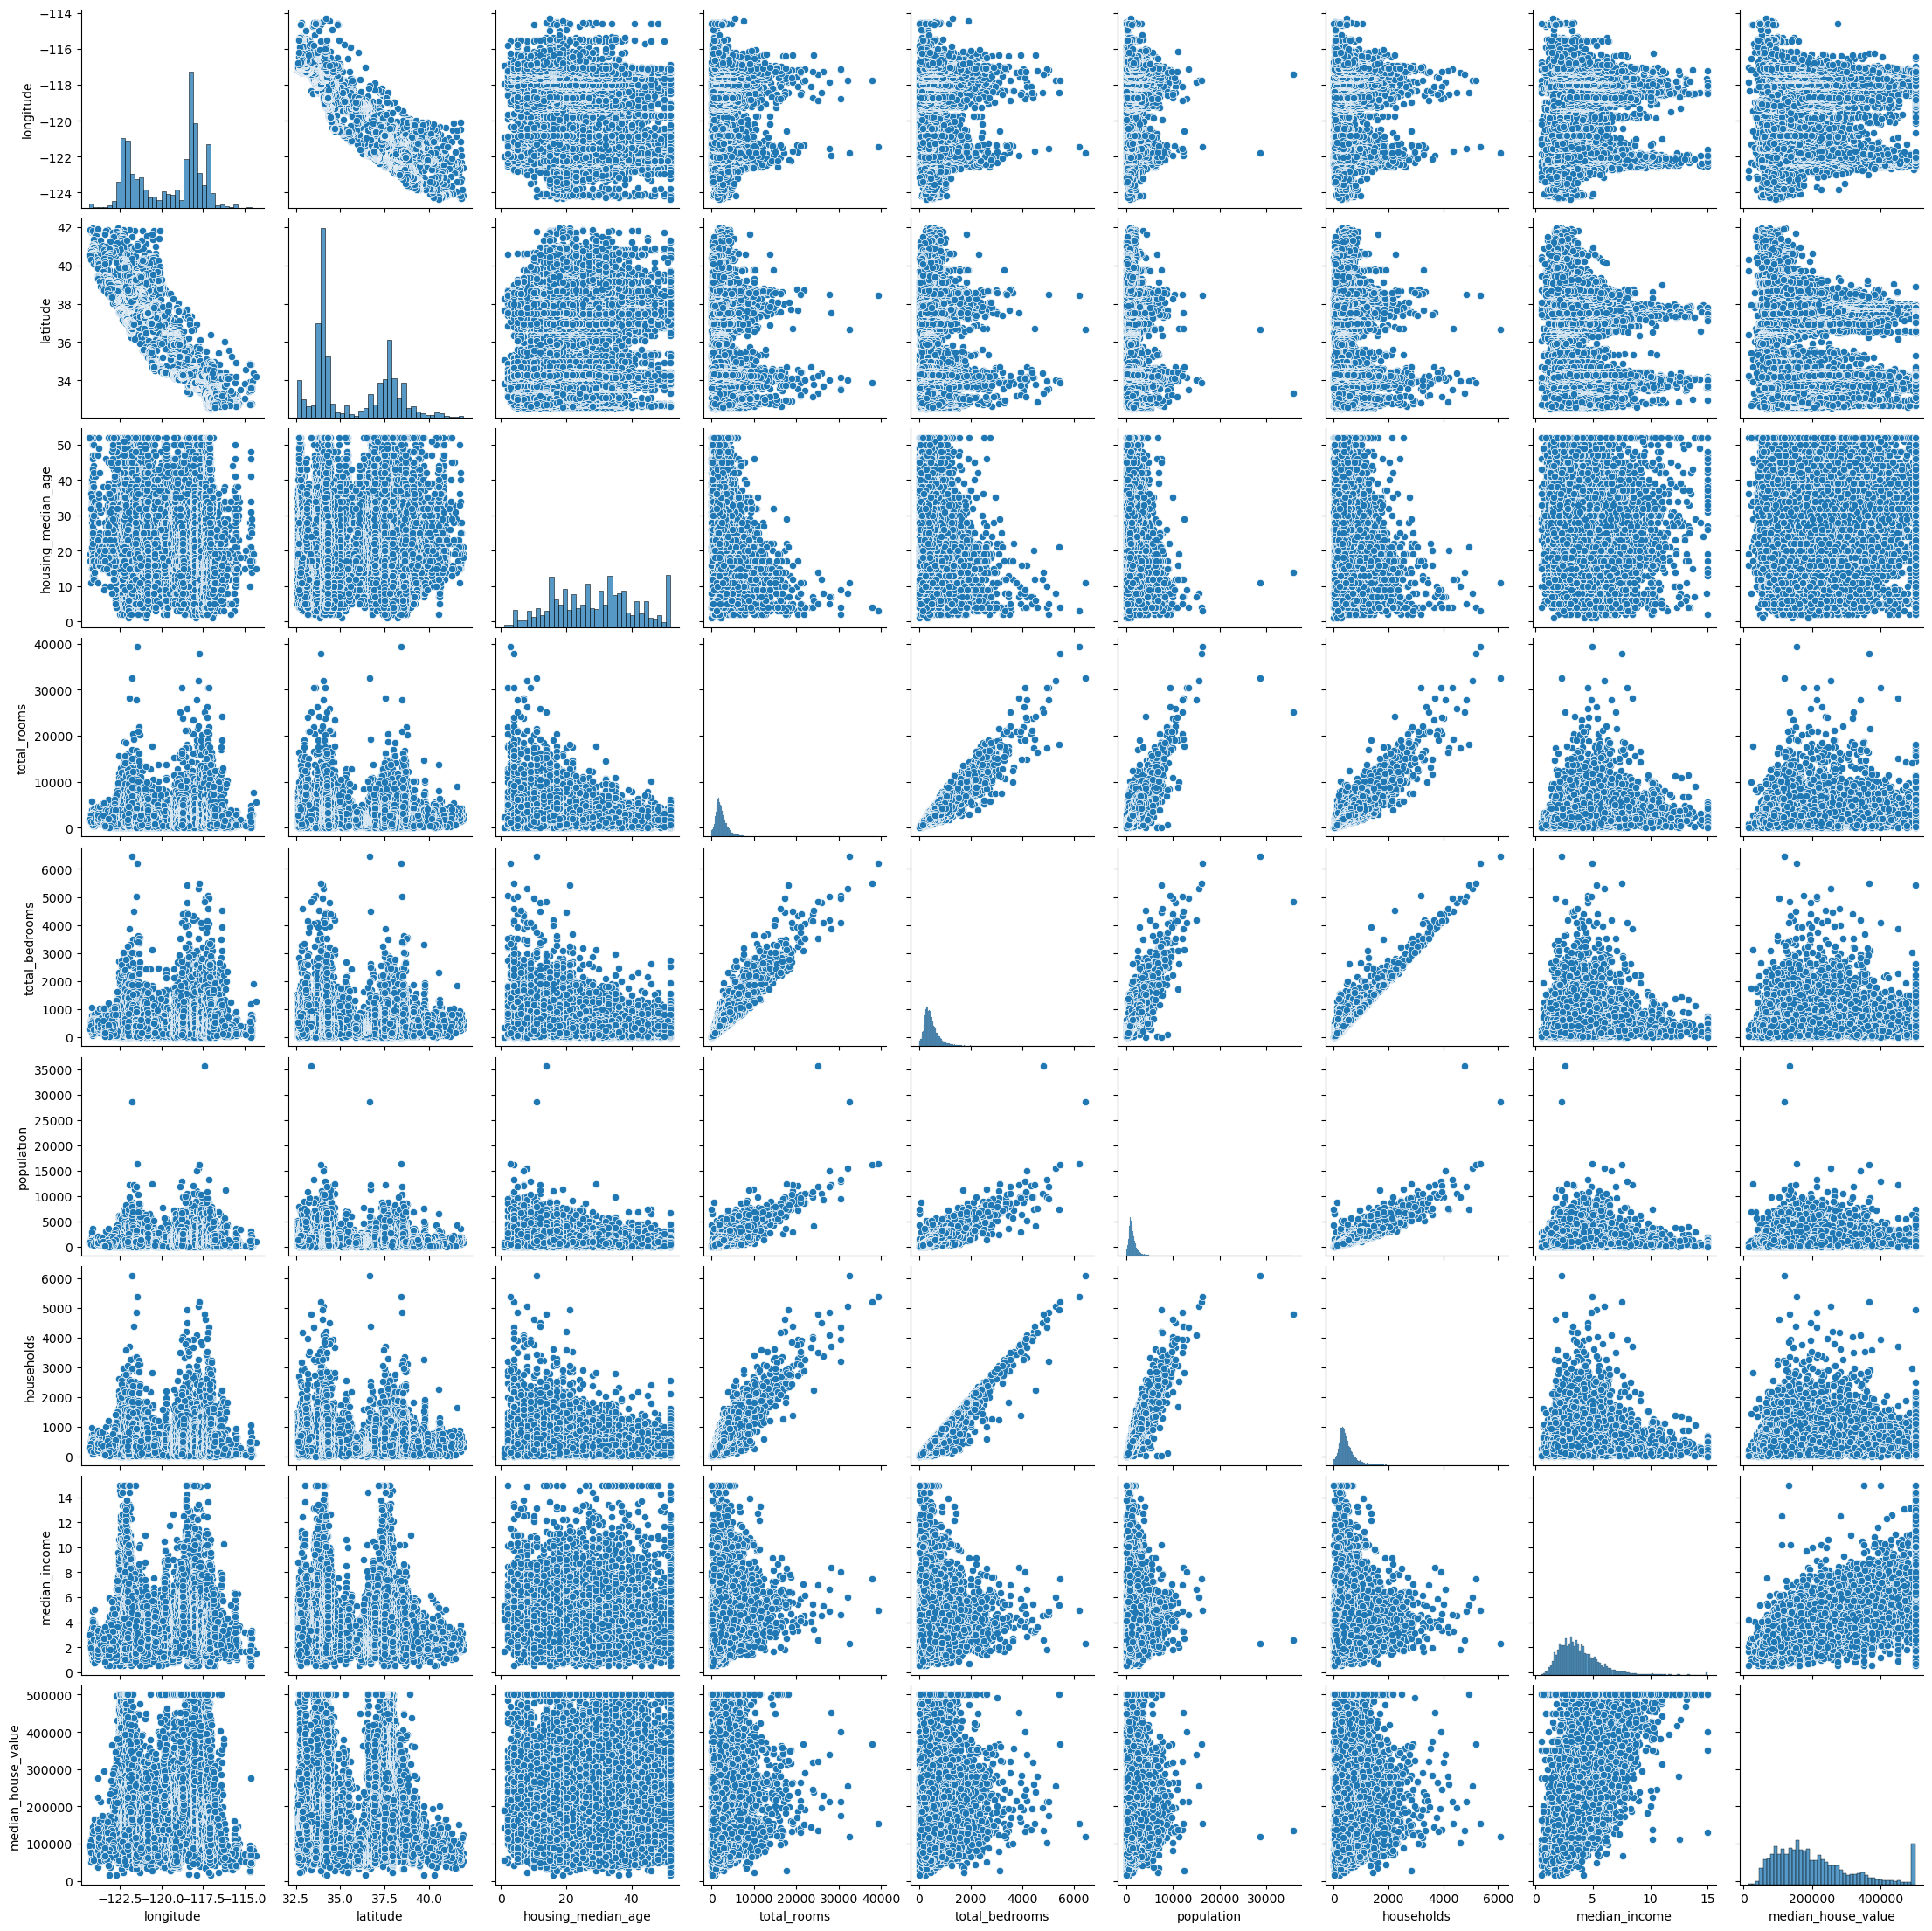

In [3]:
sns.pairplot(data) #pairplot to obersve every aspect of data 

In [4]:
data.mean()

/tmp/ipykernel_20136/531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [5]:
data.median()

/tmp/ipykernel_20136/4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [6]:
data.std()

/tmp/ipykernel_20136/2723740006.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

## Part 1: Linear Regression

You chose 3 columns that appear to make sense to compute the missing target value
(by your understanding of the topic).
Compute correlations between all agreed columns and the target column.

Predict MedianHouseValue by MedianIncome, HousingMedianAge, totalRooms

In [7]:
result_1 = st.pearsonr(data["median_income"],data["median_house_value"])
result_1                    

PearsonRResult(statistic=0.6880752079585478, pvalue=0.0)

In [8]:
result_2 = st.pearsonr(data["housing_median_age"],data["median_house_value"])
result_2

PearsonRResult(statistic=0.10562341249320992, pvalue=2.761860676104524e-52)

In [9]:
result_3 = st.pearsonr(data["total_rooms"],data["median_house_value"])
result_3

PearsonRResult(statistic=0.1341531138065631, pvalue=1.6893845634430203e-83)

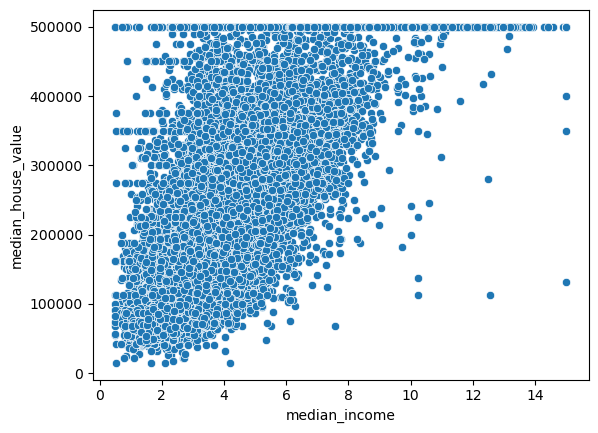

In [10]:
ax = sns.scatterplot(data, x = "median_income" , y = "median_house_value")

Take the column of the 3 with the highest correlation to your target and build a linear
model with it, using the smf.ols()-function.

In [11]:
import statsmodels.formula.api as smf

In [12]:
linear_model = smf.ols(formula = "median_house_value ~ median_income", data = data)

In [51]:
model = linear_model.fit() #fitting the model

In [14]:
model.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
No. Observations:               20640   F-statistic:                 1.856e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
=================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = pd.Series(range(0,16))
x_df = pd.DataFrame(X)
x_df.columns = ["median_income"]
x_df

median_income
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
11             11
12             12
13             13
14             14
15             15

In [16]:
prediction = model.predict(x_df)
prediction

0      45085.576703
1      86879.425905
2     128673.275107
3     170467.124309
4     212260.973511
5     254054.822713
6     295848.671915
7     337642.521117
8     379436.370318
9     421230.219520
10    463024.068722
11    504817.917924
12    546611.767126
13    588405.616328
14    630199.465530
15    671993.314732
dtype: float64

Make a scatter plot of explanatory and target column and plot the line of your linear model.

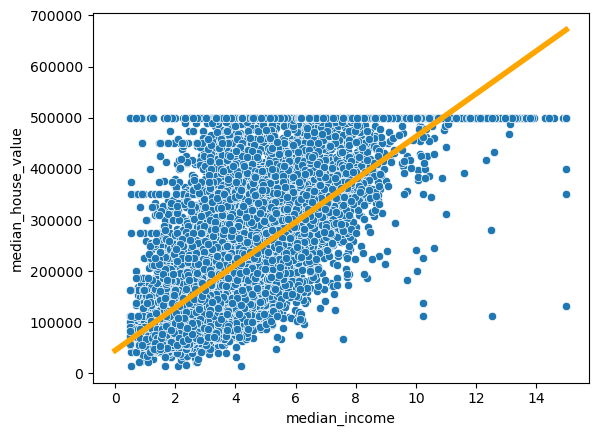

In [17]:
ax.plot(X, prediction,color = "orange", lw = 4)
ax.figure

In [18]:
model.params

Intercept        45085.576703
median_income    41793.849202
dtype: float64

In [19]:
slope = model.params["median_income"]
intercept = model.params["Intercept"]
print(slope)
print(intercept)

41793.84920189624
45085.57670326801


Predictions based on line equation

In [20]:
slope * 5 + intercept #prediction for median house value based on 5 median income

254054.8227127492

## Quality of the model - R Squared Value

Check if you model is reasonable:

Look at the R²-value

In [21]:
model.rsquared

0.47344749180719903

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(data["median_house_value"],model.fittedvalues)

83733.57452616918

# Plotting Residuals

In [24]:
model.resid

0         59572.269921
1        -33533.036468
2          3699.742099
3         60367.552866
4        136366.920496
             ...      
20635    -32196.519613
20636    -74844.090343
20637    -23835.120346
20638    -38423.051933
20639    -55514.364907
Length: 20640, dtype: float64

Plot the residuals against the explanatory variable. Any pattern?

<Axes: xlabel='median_income', ylabel='None'>

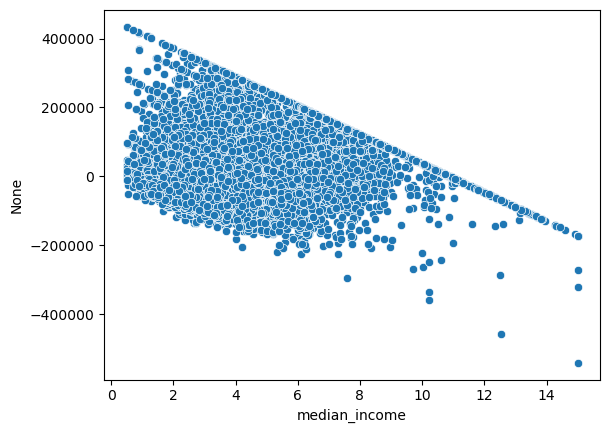

In [53]:
sns.scatterplot(x = "median_income",y = model.resid, data = data) #There is a pattern 

Plot the histogram of residuals. Do they follow a normal distribution?

<Axes: ylabel='Count'>

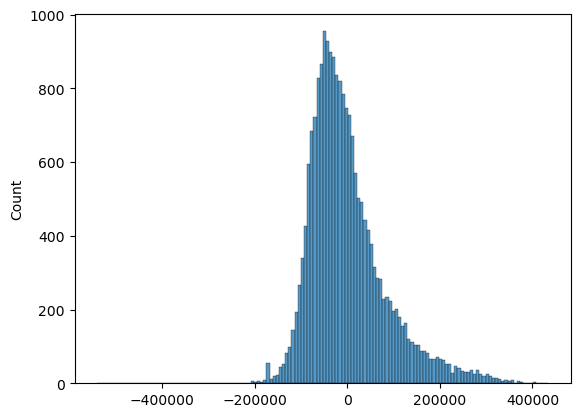

In [54]:
sns.histplot(model.resid) #They do follow a normal distribution

Now include the other two columns in a multivariate linear regression. Make a new model,
explaining the target by column1 + column2 + column3.

In [27]:
new_linear_model = smf.ols(formula = "median_house_value ~ median_income + housing_median_age + total_rooms ", data = data)

In [28]:
new_model = new_linear_model.fit()

In [29]:
new_model.params

Intercept            -24329.879421
median_income         42467.038896
housing_median_age     1974.980616
total_rooms               3.887804
dtype: float64

In [30]:
new_model.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
No. Observations:               20640   F-statistic:                     7266.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.433e+04   2160.326    -11.262      0.000   -2.86e+04   -2.01e+04
median_income       4.247e+04    301.230    140.979      0.000    4.19e+04    4.31e+04
housing_median_age  1974.9806     47.799     41.319      0.000    1881.291    2068.670
total_rooms            3.8878      0.279     13.919      0.000       3.340       4.435
======================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
median_income_slope = new_model.params["median_income"]
new_intercept = new_model.params["Intercept"]
housing_median_age_slope = new_model.params["housing_median_age"]
total_rooms_slope = new_model.params["total_rooms"]

print(new_intercept)
print(median_income_slope)
print(housing_median_age_slope)
print(total_rooms_slope)


-24329.87942055471
42467.03889602497
1974.9806156585782
3.887803808267324


In [32]:
new_intercept + 5.542 * median_income_slope + 44 * housing_median_age_slope + 1604 * total_rooms_slope

304157.6345386539

Did the R² get better? How much?

In [33]:
model.rsquared #old models R Square

0.47344749180719903

In [34]:
new_model.rsquared # new models R Square 

0.5136851787430972

We can conclude that R value is increased 

Are the residuals still behaving nicely? Make the two plots again.

In [35]:
new_model.resid

0        38987.814610
1       -38780.109435
2       -40172.808864
3        18332.078160
4        94168.705608
             ...     
20635   -19679.150101
20636   -45409.295965
20637     2098.133047
20638   -13045.541771
20639   -30134.113143
Length: 20640, dtype: float64

<Axes: xlabel='median_house_value', ylabel='None'>

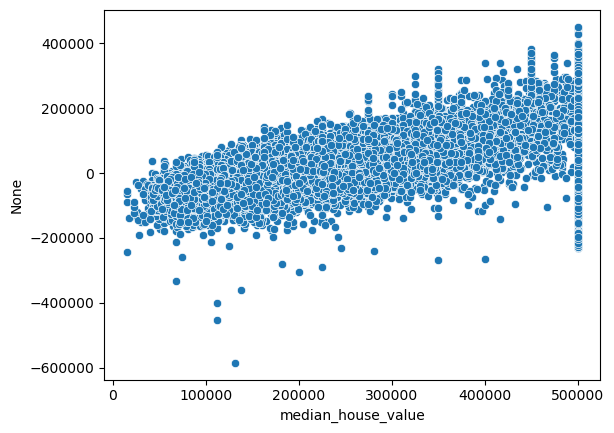

In [56]:
sns.scatterplot(x = "median_house_value",y = new_model.resid, data = data) #There is a pattern which we dont want

<Axes: ylabel='Count'>

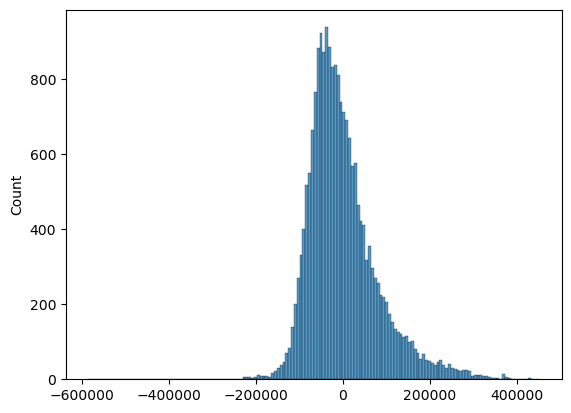

In [57]:
sns.histplot(new_model.resid) #They do follow a normal distribution

## Part 2: t-test

Choose 2 groups of at least 100 data points where you would like to explore the difference
on two different columns.
Subselect your dataframe into those two distinct groups.

I would consider Two groups for the T-Test: INLAND vs NEAR BAY and Check for difference in MedianHouseValue, MedianIncome

In [38]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Subselect your dataframe into those two distinct groups.

In [39]:
mhv_inland = data.loc[data["ocean_proximity"] == "INLAND","median_house_value"]
mhv_inland

954      315600.0
957      323000.0
965      337200.0
967      311500.0
968      296900.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 6551, dtype: float64

In [40]:
mhv_nearbay = data.loc[data["ocean_proximity"] == "NEAR BAY","median_house_value"]
mhv_nearbay

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
19067    297600.0
19068    208000.0
19069    262300.0
19077    213200.0
19104    246300.0
Name: median_house_value, Length: 2290, dtype: float64

Calculate the mean, median and standard deviation for each numerical column again for
each group separated.

In [41]:
print(mhv_inland.mean())
print(mhv_nearbay.mean())

124805.39200122119
259212.31179039303


In [42]:
print(mhv_inland.median())
print(mhv_nearbay.median())

108500.0
233800.0


In [43]:
print(mhv_inland.std())
print(mhv_nearbay.std())

70007.90849411594
122818.53706389807


From the new datasets, choose the first column and do a two sample-t-test to compare
the means.

In [44]:
ttest_ind(mhv_inland,mhv_nearbay)

TtestResult(statistic=-63.76872576298976, pvalue=0.0, df=8839.0)

Are they significantly different (by a confidence interval of 95%)?

---> Yes, they are! P-Value is 0.0 where we reject null hypothesis and conclude that there is a significant difference

Do the same for the other column.

In [45]:
mi_inland = data.loc[data["ocean_proximity"] == "INLAND","median_income"]
mi_inland

954      5.1406
957      6.4994
965      7.3330
967      6.5214
968      6.4524
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 6551, dtype: float64

In [46]:
mi_nearbay = data.loc[data["ocean_proximity"] == "NEAR BAY","median_income"]
mi_nearbay

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
19067    5.7984
19068    2.5658
19069    4.2237
19077    3.5625
19104    3.6392
Name: median_income, Length: 2290, dtype: float64

In [47]:
print(mi_inland.mean())
print(mi_nearbay.mean())

3.2089963822317205
4.172884759825328


In [48]:
print(mi_inland.median())
print(mi_nearbay.median())

2.9877
3.81865


In [49]:
print(mi_inland.std())
print(mi_nearbay.std())

1.4374652023967094
2.017427251576444


In [50]:
ttest_ind(mi_inland,mi_nearbay)

TtestResult(statistic=-24.69452557254428, pvalue=2.955575181919361e-130, df=8839.0)

Are they significantly different (by a confidence interval of 95%)?

---> No, they are NOT! P-Value is 2.955 where we accept null hypothesis and conclude that there is NOT a significant difference